In [2]:
'''
VI. 차원 축소
    1. 차원축소 개요
        - PCA, LDA, SVD, NMF 등의 차원축소 알고리즘 존재
        - 데이터 피처가 많으면 상관관계를 가질 가능성(다중공선성문제) 때문에 예측능력이 떨어짐
        - 차원 축소를 통해 시각화 가능
        - 차원축소는 피처선택(특정 피처는 삭제하는 과정)과 피처추출(기존 피처를 저차원의 중요 피처로 압축해서 추출)로 나뉨; 피처 추출은 기존 피처를 단순 압축하는 것이 아니라 아예 새로운 공간으로 매핑(ex) 모의고사성적+내신성적 -> 학업성취도
        - 텍스트 분석, 이미지분석에서 활용성이 높음
        
    2. PCA
        (1) PCA개요
            - 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원 축소(이 축이 PCA의 주성분이 됨)
            - 선형대수의 관점에서 입력데이터의 공분산행렬을 고유값 분해 후 구한 고유벡터엥 입력데이터를 선형 변환; 이때 고유벡터가 PCA의 주성분벡터를 나타내며 고유값이 고유벡터의 크기와 입력데이터의 분산을 나타냄
            - 고유벡터는 Ax = hx를 만족하는 x, x의 개수는 최대 A(n x n)의 차원개수(n)만큼 존재가능, 고유벡터는 A를 곱하더라도 방향이 변하지 않고 크기만 변하게됨
            - 공분산 행렬 C(n x n)는 대칭행렬로(C.T = C) C = PKP.T 로 분해가능, (P는 직교행렬), 이때 P는 고유벡터로 이뤄진 n x n 행렬이며 K는 고유값으로 이뤄진 n x n 행렬 
            - 어쨋든 중요한 것은 공분산행렬은 고유벡터+고유값으로 분해 가능 -> 고유벡터를 이용, 입력 데이터를 선형변환하는 방식이 PCA
            - PCA가 이루어지는 과정은
                (i) 입력 데이터 세트의 공분산 행렬 생성
                (ii) 공분산 행렬의 고유벡터와 고유값 계산
                (iii) 고유값이 가장 큰 순으로 K개 만큼 고유벡터 추출
                (iv) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용, 입력데이터 변환
'''

#붓꽃 데이터의 피처를 4개에서 2개로 압축하기

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
#넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


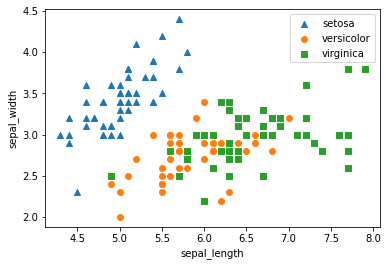

In [6]:
# sepal width 와 sepal length를 기준으로 품종 분포 시각화
markers = ['^','o','s']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [8]:
# PCA를 적용하기 전, 개별 속성들이 일치되게끔 동일한 스케일로 변환필요 -> StandardScaler 클래스 이용
from sklearn.preprocessing import StandardScaler

#Target값을 제외하고 표준화
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [9]:
#스케일링이 적용된 데이터 세트에 4차원 -> 2차원 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled) #결과는 ndarray로 반환
iris_pca.shape

(150, 2)

In [11]:
#PCA 변환된 데이터를 DataFrame화
pca_columns = ['pca_component1','pca_component2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = irisDF['target']
irisDF_pca

,pca_component1,pca_component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


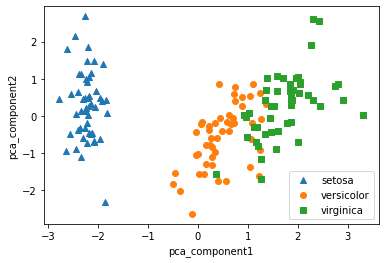

In [13]:
# pca_component를 기준으로 시각화
markers = ['^','o','s']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF['target']==i]['pca_component1']
    y_axis_data = irisDF_pca[irisDF['target']==i]['pca_component2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

In [14]:
# PCA Component별로 원본 데이터의 변동성을 어마나 반영하고 있는지 확인해보려면
print(pca.explained_variance_ratio_)

#첫번째 component가 전체 변동성의 약 73%, 두번째 component가 전체변동성의 약 23% 설명 -> 두 component로 원본데이터 변동성의 약 95% 설명가능

[0.72962445 0.22850762]


In [22]:
#원본 데이터와 PCA 변환 데이터간의 예측성능을 교차검증으로 비교

#원본데이터
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier()
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print(np.mean(scores))

0.9533333333333333


In [23]:
#PCA 변환데이터 -> 분명 예측 성능은 감소하지만 피처가 50% 감소한 것에 비하면 양호

rcf = RandomForestClassifier()
scores = cross_val_score(rcf, irisDF_pca.iloc[:,:-1], irisDF_pca.iloc[:,-1], scoring='accuracy',cv=3)
print(np.mean(scores))

0.8866666666666667


In [45]:
# creditcard 데이터로 PCA 변환시 정확성이 얼마나 감소하는지 확인해보기
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients -> Data Folder -> default of credit card clients.xls

df = pd.read_excel('credit_card.xls',header=1, sheet_name='Data').iloc[0:, 1:] #의미없는 첫행, 첫열 제거
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<AxesSubplot:>

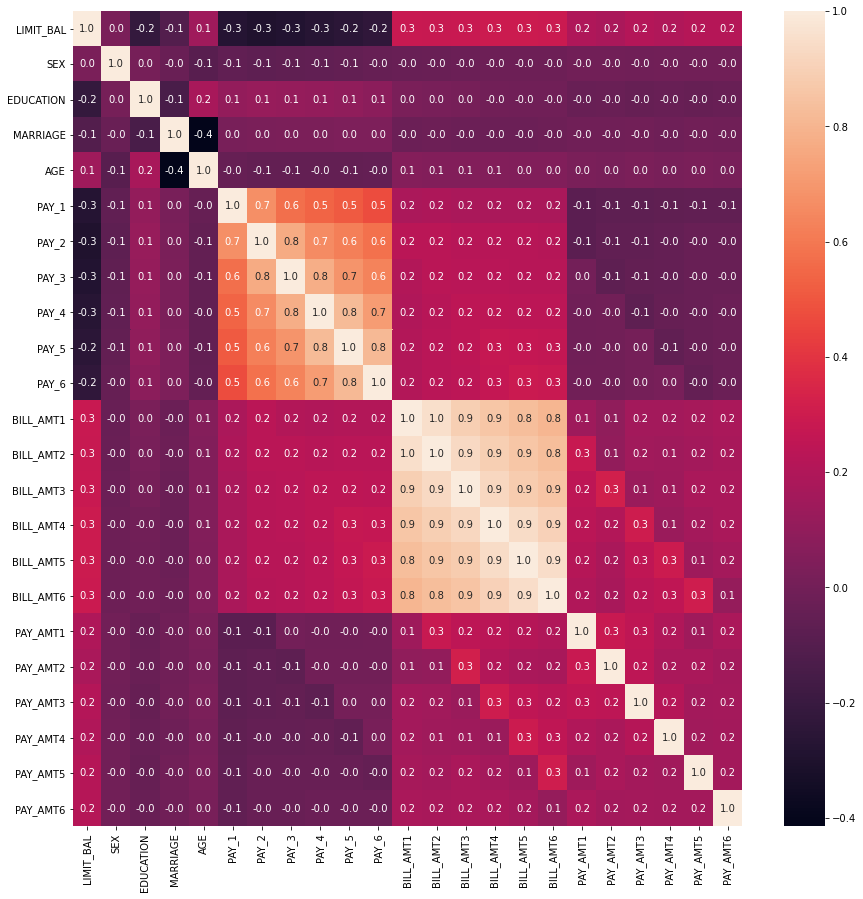

In [48]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace = True)

y_target = df['default']
X_features = df.drop('default', axis=1, inplace = False)

import seaborn as sns

corr = X_features.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True,  fmt='.1f') #sns.heatmap()으로 변수간 상관계수 시각화

In [50]:
# BILL_AMT1 ~ BILL_AMT6 간의 상관도가 높으므로 이 6개 속성을 2개의 컴포넌트로 변환

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill]) #일부분만 PCA 하고 싶으면 이렇게 따로 분리해서 하면 됨
pca = PCA(n_components=2)
pca.fit(df_cols_scaled) #결과를 받고싶으면 fit_transform()
print(pca.explained_variance_ratio_)

#PCA 변환 후 원본 변동성의 95% 설명 가능

[0.90555253 0.0509867 ]


In [51]:
#원본 데이터와 6개 component로 변환한 PCA 변환 데이터 예측 결과 비교

#원본데이터
rcf = RandomForestClassifier(n_estimators=300)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy',cv=3)
print(np.mean(scores))

0.8169333333333334


In [54]:
#PCA 6개 콤포넌트로 변환한 데이터
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

scores = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)
print(np.mean(scores))

0.7975333333333333


In [62]:
'''
III. LDA(Linear Discriminant Analysis)
    1. LDA 개요
        - 선형 판별 분석법으로 PCA와 유사하지만 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 유지하면서 차원을 축소
        - 즉 PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음 -> 이를 위해 클래스간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소
        - LDA가 이루어지는 과정은
            (i) 클래스 내부 분산 행렬(SW)과 클래스간 분산행렬(ST)을 구함
            (ii) SW.T * ST = P.T K P 로 분해
            (iii) 고유값이 가장 큰 순으로 K개 추출
            (iv) 추출된 고유값에 해당하는 고유벡터를 이용해 새롭게 입력데이터 변환
'''

#붓꽃 데이터 세트에 LDA 적용
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # 타깃 데이터도 같이 넣어줌에 주의
iris_lda = lda.transform(iris_scaled)

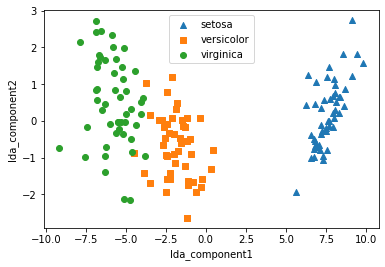

In [63]:
#시각화

lda_columns = ['lda_component1','lda_component2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target
irisDF_lda

markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF['target']==i]['lda_component1']
    y_axis_data = irisDF_lda[irisDF['target']==i]['lda_component2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('lda_component1')
plt.ylabel('lda_component2')
plt.show()

In [66]:
'''
IV. SVD(특이값 분해, Singular Value Decomposition)
    1. SVD개요
        - PCA는 square matrix만을 고유벡터로 분해할 수 있지만, SVD는 squared matrix가 아니더라도 분해 가능 -> m x n인 A = UKV.T 로 분해 ; U는 m x m,K는 m x n, V는 n x n
        - 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며 특이벡터는 직교하는 성질을 지님, K는 대각행렬로 off-diagonal은 모두 0
        - Truncated SVD는 K의 대각 원소 중 상위 몇개만 추출해서 여기 해당하는 U, V 원소도 함께 제거해 차원을 더욱 줄인 형태로 분해하는 것
        - 넘파이를 통해 실행
'''
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [67]:
#a에 svd도출해서 U, K(=Sigma), V.T 도출
U, Sigma, Vt = svd(a)
print('U matrix :', np.round(U,3))
print('SIgma matrix :', np.round(Sigma, 3)) # 대각행렬은 벡터로 반환
print('V.T matrix :', np.round(Vt, 3))

U matrix : [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
SIgma matrix : [3.423 2.023 0.463 0.079]
V.T matrix : [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [69]:
#SIgma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat), Vt) #여러개의 행렬곱은 이렇게 표현
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [71]:
#데이터 세트가 로우가 의존성이 있을 경우 Sigma값 변화 확인
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

U, Sigma, Vt = svd(a)
print('SIgma matrix :', np.round(Sigma, 3)) #Sigma값 중 2개가 0으로 변함(선형독립인 로우 벡터의 수가 2개라는 의미)


[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]
SIgma matrix : [2.663 0.807 0.    0.   ]


In [72]:
#의존성이 높은 a행렬 복원

#U, K, V.T 모두 2행에 해당하는 값만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]

a_ = np.dot(np.dot(U_, Sigma_),Vt_)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [11]:
# Truncated SVD를 이용해 행렬 분해 -> scipy이용

import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본행렬에 SVD적용
matrix = np.random.random((6,6))
print('원본행렬 :\n', np.round(matrix,3))
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('SIgma :\n', Sigma)

#Truncated SVD 적용, Sigma의 특이값은 4개로 설정
num_components=4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('Sigma_tr :\n', Sigma_tr)

#복원
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)
print('Truncated SVD로 복원된 행렬 :\n', np.round(matrix_tr,3))

원본행렬 :
 [[0.629 0.871 0.088 0.112 0.095 0.677]
 [0.302 0.45  0.116 0.829 0.644 0.23 ]
 [0.377 0.973 0.738 0.264 0.641 0.623]
 [0.968 0.23  0.011 0.488 0.842 0.022]
 [0.784 0.336 0.665 0.071 0.1   0.926]
 [0.678 0.271 0.988 0.464 0.757 0.312]]
SIgma :
 [2.99801274 1.2215601  0.86477606 0.76057702 0.4045085  0.11241225]
Sigma_tr :
 [0.76057702 0.86477606 1.2215601  2.99801274]
Truncated SVD로 복원된 행렬 :
 [[ 0.604  0.837  0.068  0.123  0.119  0.732]
 [ 0.347  0.553  0.135  0.624  0.733  0.093]
 [ 0.363  0.926  0.741  0.403  0.557  0.679]
 [ 0.953  0.188  0.01   0.599  0.78   0.073]
 [ 0.822  0.41   0.688 -0.04   0.13   0.823]
 [ 0.657  0.244  0.969  0.463  0.787  0.358]]


In [14]:
# 만약 6x4 랜덤 행렬 a 생성하면?
np.random.seed(121)
a = np.random.randn(6,4)
print(np.round(a,3))

from numpy.linalg import svd
U, SIgma, Vt = svd(a)

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]
 [-0.79  -0.733  0.088 -0.5  ]
 [ 0.504  0.607  1.166  0.824]]


In [17]:
np.diag(Sigma)

array([[2.99801274, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.2215601 , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.86477606, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.76057702, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.4045085 ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11241225]])

In [18]:
# 복원은 어떻게 하는지?
a_ = np.dot(np.dot(U,Sigma),Vt)
print(a_)

ValueError: shapes (6,) and (4,4) not aligned: 6 (dim 0) != 4 (dim 0)

Text(0.5, 0, 'TruncatedSVD Component2')

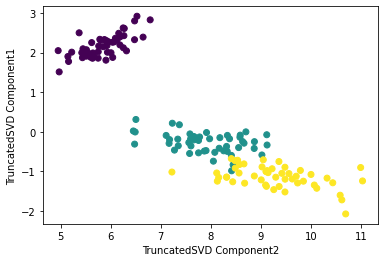

In [20]:
'''
    2. 사이킷런 TruncatedSVD클래스를 이용한 변환
        - U, Sigma, Vt행렬을 따로 반환하지는 X
'''
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD, PCA
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
#2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

#산점도 2차원으로 TruncatedSVD 변환된 데이터 표현
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.ylabel('TruncatedSVD Component1')
plt.xlabel('TruncatedSVD Component2')

Text(0.5, 1.0, 'PCA Transformed')

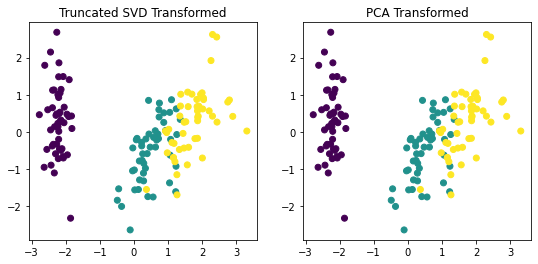

In [21]:
# 사실 TruncatedSVD와 PCA는 거의 동일한 기법을 사용하기 때문에 Scaling 후 비교하면 결과가 유사한 것을 확인
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

C:\Users\1\anaconda3\envs\virtualtensor3.7\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Text(0, 0.5, 'NMF Component2')

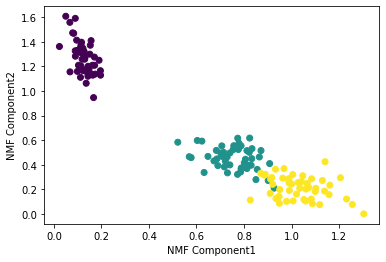

In [23]:
'''
V. NMF(Non-Negative Matrix Factorization)
    1. NMF 개요
        - Truncated SVD와 같이 낮은 랭크를 통한 행렬근사 방식
        - 모든 성분이 양수인 행렬에 대해 V(m x n) ≒ W(m x k) * H(k x n) 으로 분해하는 기법
        - 이때 W는 m > k로 세로로 긴 행렬이 되고, H는 k < n으로 가로로 긴 행렬이 됨 -> W는 원본행에 대한 정보를, H는 원열 열의 정보를 나타냄
        - SVD와 유사하게 차원축소를 통한 잠재요소 도출로 이미지 변환 및 압축, 텍스트 토픽 도출 등에 사용
'''

from sklearn.decomposition import NMF

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1],c=iris.target)
plt.xlabel('NMF Component1')
plt.ylabel('NMF Component2')